# Medical Image Analysis
**by: Kenenbaev Kalyibek, Djarasheva Ayan, Zholdoshbek Tilek**

## DICOM  

To work with DICOM files, we’ll use the **pydicom** library.   
We import all the libraries necessary for the work.


We read the file using the dcm **read()**.  
Let’s take the file as an example to display the given X-ray image.

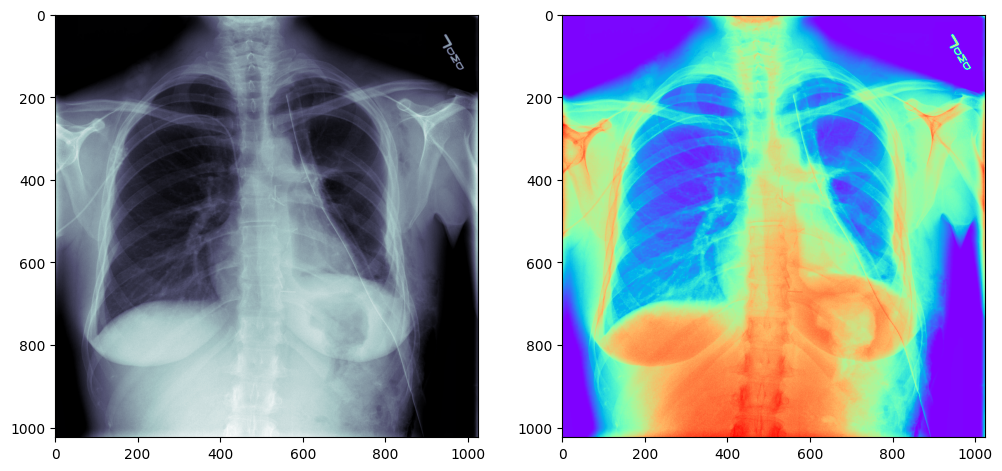

In [1]:
import pydicom
from matplotlib import cm
from matplotlib import pyplot as plt


path = 'dicom/ID_01fe90211.dcm'
imagedata= pydicom.dcmread(path)

f = plt.figure(figsize=(12, 12))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.imshow(imagedata.pixel_array, cmap=plt.cm.bone) # -> To make the image look like an X-ray.
ax2.imshow(imagedata.pixel_array, cmap=plt.cm.rainbow) #  -> Rainbow color scheme used.

We can remove the **plt.cm.bone** color scheme, or try other color scheme.

## NIfTI-1  


Let’s look at an example to understand this approach.  
- First, we import all the libraries necessary for this work.
- Then, we read the file using **load()**.
- We use **get_fdata()** to get an image.
- Turn the image **90** degrees, and look at the shape of the file contents.
- The “depth” here means CT slices. We use imshow() to visualize **50** and **118** CT slices.

(512, 512, 301)


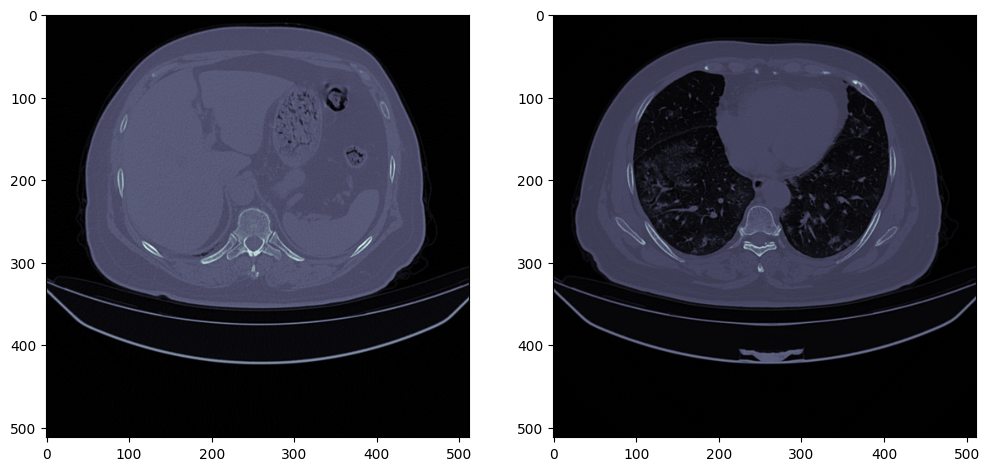

In [2]:
import nibabel
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt


path = 'NIfTI-1/coronacases_org_001.nii'
imagedata=nibabel.load(path) 

array = imagedata.get_fdata()
array = np.rot90(np.array(array)) 

print(array.shape)

f = plt.figure(figsize=(12,12))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.imshow(array[..., 50].astype(np.float32), cmap=plt.cm.bone) 
ax2.imshow(array[..., 118].astype(np.float32), cmap=plt.cm.bone)

# Exploration of Metadata  


We’ll look at the metadata of DICOM files.

**DICOM** files contain metadata in addition to the image.  
Let’s try to explore our metadata.  


### Patient Metadata  

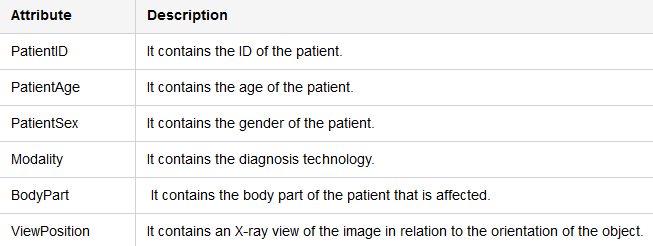

**The part that says “X-ray view of the image in relation to the orientation of the object”  
represents the view position, that is, PA=Front and AP=Back.**

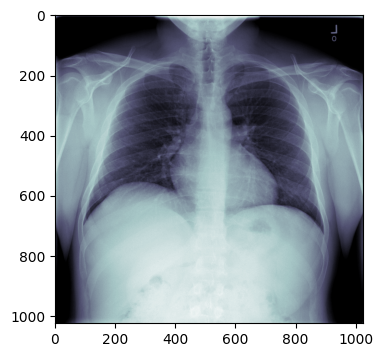

ID: 
Age: 31
Sex: M
Modality: CR
BodyPart: CHEST
X-ray view of the image in relation to the orientation of the object: PA


In [3]:
path = 'dicom/ID_0ab3c2234.dcm'
imagedata= pydicom.dcmread(path) # -> read the file

# Show X-ray image
plt.figure(figsize=(4, 4))
plt.imshow(imagedata.pixel_array, cmap=plt.cm.bone)
plt.show()

print("ID:", imagedata.PatientID)
print("Age:", imagedata.PatientAge)
print("Sex:", imagedata.PatientSex)
print("Modality:", imagedata.Modality)
print("BodyPart:", imagedata.BodyPartExamined)
print("X-ray view of the image in relation to the orientation of the object:", imagedata.ViewPosition)

#### The main types (Modality) of medical images supported by the DICOM Standard:  
 
 - Computed Radiography (CR)
 - Computed Tomography (CT)
 - Digital Radiography (DX)
 - Mammography (MG)

# Plotting to analyze metadata
 
 - We’ll choose only the age of the patients to plot the histogram.  
 - We’ll count the number of patients of the same age on the x-axis and the age of the patients on the y-axis.

C:\Users\Kalyibek\AppData\Local\Temp\ipykernel_4480\3712435697.py:33: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


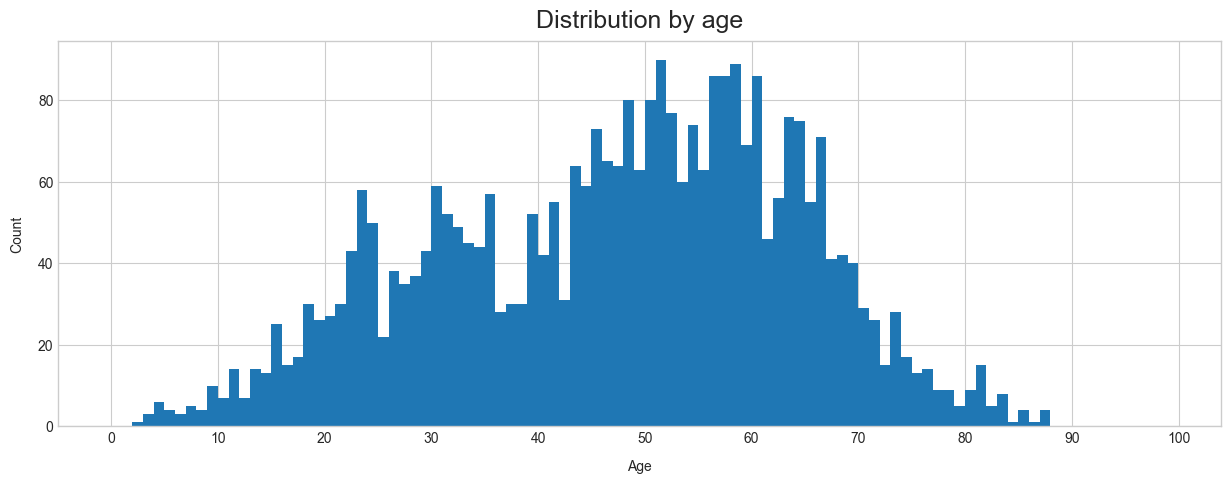

In [4]:
from glob import glob
import pandas as pd
import seaborn as sns

data = sorted(glob('dicom/*.dcm')) # -> List containing paths to all files

# For the convenience of analysis, we will create a dataframe with metadata
patients = []

for file in data:
    filedata = pydicom.dcmread(file)
    
    patient = {}
    
    patient['Age'] = filedata.PatientAge
    patient['Sex'] = filedata.PatientSex
    patient['Modality'] = filedata.Modality
    patient['BodyPart'] = filedata.BodyPartExamined
    patient['ViewPosition'] = filedata.ViewPosition
    
    patients.append(patient)
    
    df_patients = pd.DataFrame(
        patients, 
        columns=['Age', 'Sex', 'Modality', 'BodyPart', 'ViewPosition']
    )
    
    df_patients['Age'] = pd.to_numeric(df_patients['Age'])
    
# Making a histogram
sorted_ages = np.sort(df_patients['Age'].values) 

plt.style.use('seaborn-whitegrid') 
plt.figure(figsize=(15, 5))
plt.hist(sorted_ages[:-2], bins=[i for i in range(100)]) 
plt.title('Distribution by age', fontsize=18, pad=10) 
plt.xlabel('Age', labelpad=10)
plt.xticks([i * 10 for i in range(11)]) 
plt.ylabel('Count', labelpad=10) 
plt.show()

## Now let’s look at the percentage of males (M) and females (F).
We choose only the gender of the patients to find the percentage.

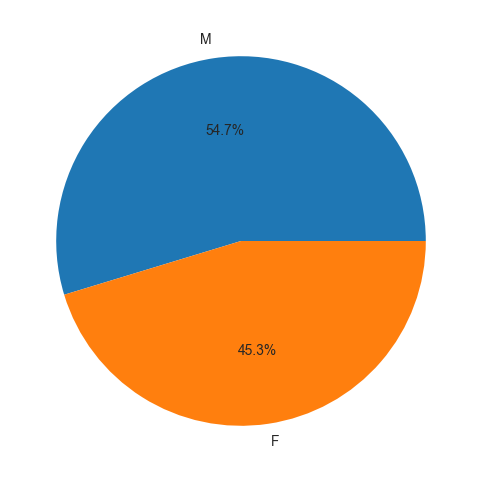

In [5]:
# Making a histogram
plt.figure(figsize=(6, 6))

plt.pie(
    [df_patients[df_patients["Sex"] == "M"].shape[0],
     df_patients[df_patients["Sex"] == "F"].shape[0]], 
    labels=["M", "F"], 
    autopct='%1.1f%%'
)

plt.show()

# Windowing

Windowing is also known as gray level mapping, contrast stretching, histogram modification, or contrast enhancement. This process manipulates the grayscale CT image using CT numbers. This changes the appearance of the image to highlight certain structures. The brightness and contrast of the image are adjusted using the window level and window width.

In [6]:
path = 'NIfTI-1/coronacases_org_003.nii'
imagedata = nibabel.load(path) 

array = imagedata.get_fdata()
array = np.rot90(np.array(array))

def windowed(px, w, l):
    px_min = l - w // 2
    px_max = l + w // 2
    px[px < px_min] = px_min
    px[px > px_max] = px_max

    return (px-px_min) / (px_max-px_min)
    
print(array[...,50].astype(np.float32))
print()
print(windowed(array[...,50].astype(np.float32), 150, 30))

[[-1001. -1001. -1001. ... -1000. -1000. -1000.]
 [-1001. -1001. -1001. ... -1000. -1000. -1000.]
 [-1001. -1001. -1001. ... -1000. -1000. -1000.]
 ...
 [-1000. -1000. -1000. ... -1001. -1001. -1001.]
 [-1000. -1000. -1000. ... -1001. -1001. -1001.]
 [-1000. -1000. -1000. ... -1001. -1001. -1001.]]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Visualize the Windowing

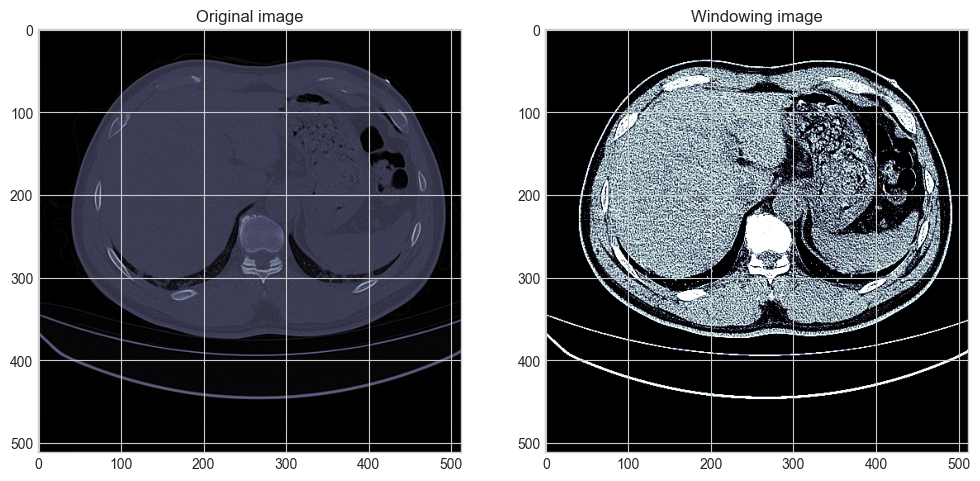

In [7]:
f = plt.figure(figsize=(12,12)) 

ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(
    array[..., 50].astype(np.float32), 
    cmap=plt.cm.bone
) 
ax.title.set_text('Original image')

ax2.imshow(
    windowed(array[..., 50].astype(np.float32), 150, 30), 
    cmap=plt.cm.bone
)
ax2.title.set_text('Windowing image')

## Other kinds of windowing

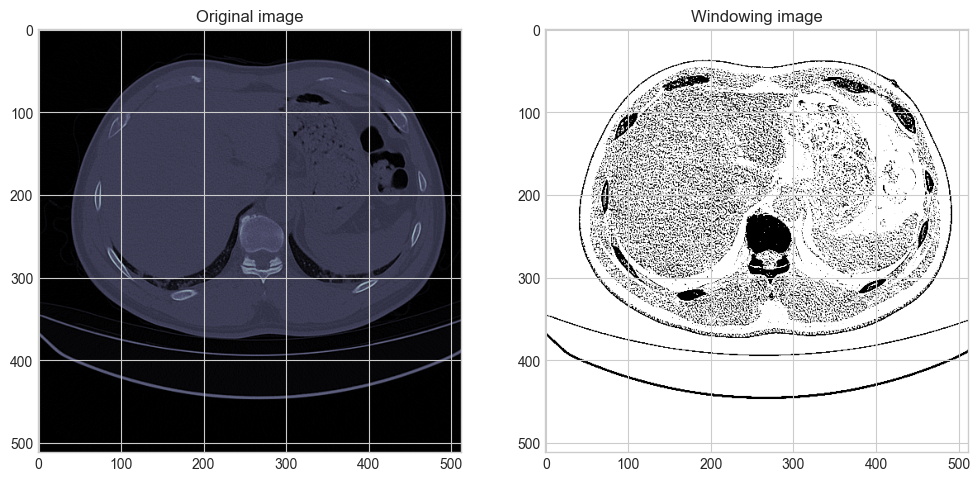

In [8]:
def rainbow_bsb_window(img):
    brain_img = windowed(img, 40, 80)
    subdural_img = windowed(img, 80, 200)
    bone_img = windowed(img, 600, 2000)
    combo = (brain_img * 0.3 + subdural_img * 0.5 + bone_img * 0.2) 

    return combo
    
f = plt.figure(figsize=(12,12))

ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(
    array[...,50].astype(np.float32), 
    cmap=plt.cm.bone
) 
ax.title.set_text('Original image') 

ax2.imshow(rainbow_bsb_window(array[..., 50].astype(np.float32))) 
ax2.title.set_text('Windowing image')

# Segmentation of Medical Images
**using the Felzenszwalb algorithm.**

**Felzenszwalb** algorithm based on image segmentation from the **skimage** library.  
It produces an over-segmentation of a multichannel (that is **RGB**)  
image using a fast, minimum spanning tree-based clustering on the image grid.

## Parameters

- The parameter scale sets an observation level. A larger-scale means fewer and larger segments.
- The number of segments produced and their size can only be controlled indirectly through scale
- Algorithm uses the Euclidean distance between pixels in color space for RGB images
 
**Our task is to segment both lungs in the already familiar X-ray image.**

C:\Users\Kalyibek\AppData\Local\Temp\ipykernel_4480\1123197705.py:15: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  im_small_filt = median(im_small, disk(50))


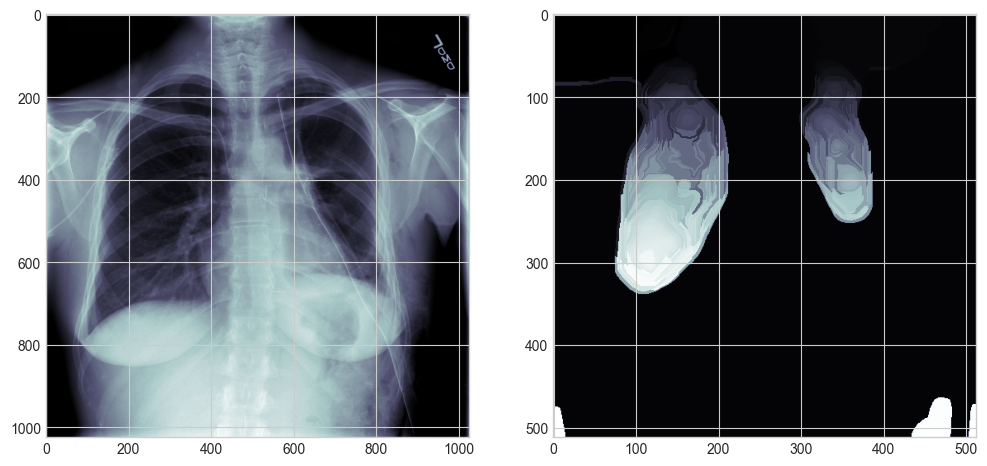

In [9]:
from skimage.exposure import equalize_hist 
from skimage.filters.rank import median
from skimage.morphology import disk
from skimage.segmentation import felzenszwalb 
from skimage.transform import rescale


path = 'dicom/ID_01fe90211.dcm' 
imagedata= pydicom.dcmread(path)

im_thres = imagedata.pixel_array.copy() 
im_thres[im_thres > 65] = 0

im_small = rescale(im_thres, 0.5) 
im_small_filt = median(im_small, disk(50)) 
im_small_filt = equalize_hist(im_small_filt)

segments = felzenszwalb(im_small_filt, scale=0.5)

f = plt.figure(figsize=(12, 12))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122) 

ax1.imshow(imagedata.pixel_array, cmap=plt.cm.bone) 
ax2.imshow(segments, cmap=plt.cm.bone)

# Lung Segmentation
 
 - First, we convert the image to png. 
 - Then, we import the lungs-segmentation library and start processing using that model.

**Here is the lungs segmentation with trained neural network**


ID: 
Age: 8
Sex: M
Modality: CR
BodyPart: CHEST
X-ray view of the image in relation to the orientation of the object: PA


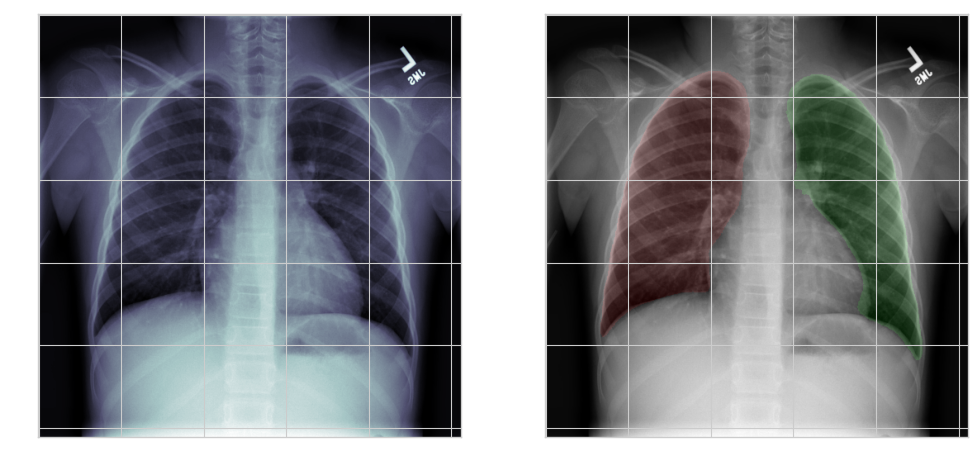

In [10]:
import cv2
import torch
import lungs_segmentation.inference as inference 
from skimage.transform import resize
from lungs_segmentation.pre_trained_models import create_model


def get_metadata(path):
    imagedata = pydicom.dcmread(path)
    
    print("ID:", imagedata.PatientID)
    print("Age:", imagedata.PatientAge)
    print("Sex:", imagedata.PatientSex)
    print("Modality:", imagedata.Modality)
    print("BodyPart:", imagedata.BodyPartExamined)
    print("X-ray view of the image in relation to the orientation of the object:", imagedata.ViewPosition)


def segment_lungs(path):
    imagedata = pydicom.dcmread(path)
    img = imagedata.pixel_array

    name = path.split('/')[-1][:-4]

    img = resize(img, (512, 512))
    filepath = 'png_xrays/{}.png'.format(name)
    cv2.imwrite(filepath, img * 255)


    model = create_model("resnet34")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    f = plt.figure(figsize=(12, 12))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122) 
    image, mask = inference.inference(model, filepath, 0.2)
    
    ax1.imshow(img, cmap=plt.cm.bone)
    ax2.imshow(inference.img_with_masks(image, [mask[0], mask[1]], alpha=0.1))
    

path = 'dicom/ID_0b27bd5c2.dcm'
segment_lungs(path)
get_metadata(path)

ID: 
Age: 49
Sex: F
Modality: CR
BodyPart: CHEST
X-ray view of the image in relation to the orientation of the object: PA


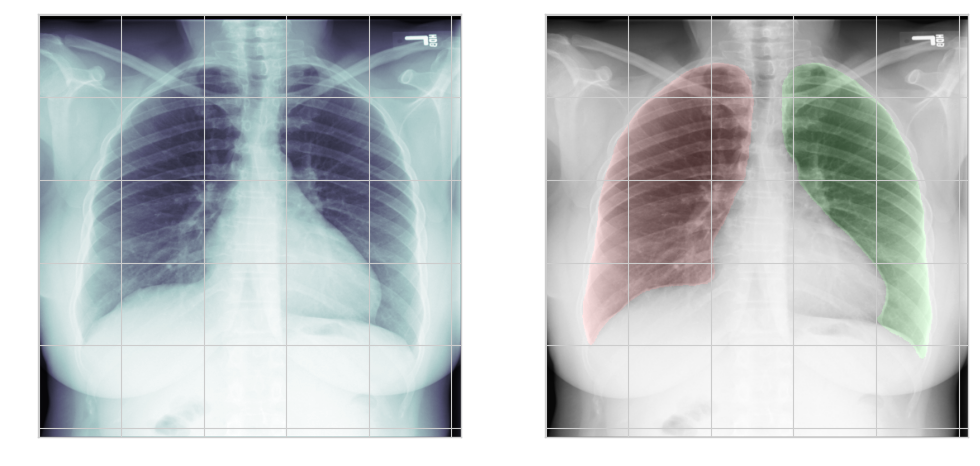

In [11]:
path = 'dicom/ID_6fcf072fc.dcm'
segment_lungs(path)
get_metadata(path)

This is where segmentation takes place on already trained models